## **Climate Foresight: Predicting CO₂ Emissions, Temperature Rise, and Sea Level Trends Using Machine Learning**

## 1.0 Business Understanding

<h3>1. Overview</h3>
<p>
Climate change is the defining crisis of our time — driving record-breaking temperatures, rising sea levels, and mounting economic losses.
Governments, humanitarian agencies, investors, and global institutions urgently need <strong>data-driven tools to anticipate and manage climate risks</strong>.
</p>
<p>
This project harnesses machine learning and time series forecasting to predict three critical indicators of climate impact:
<ul>
  <li><strong>Annual CO₂ emissions per capita</strong></li>
  <li><strong>Average annual temperature</strong></li>
  <li><strong>Global sea level rise</strong></li>
</ul>
These indicators are essential for understanding a country’s climate trajectory and for supporting timely interventions at both local and global levels.
By providing both <strong>short-term predictions</strong> and <strong>long-term forecasts</strong>, this project bridges the gap between raw data and actionable climate intelligence.
</p>

<h3>2. Problem Statement</h3>
<p>
Despite the availability of historical climate and socioeconomic data, many regions lack the capacity to <strong>forecast future trends</strong>,
identify <strong>drivers of emissions and warming</strong>, or assess the <strong>compound risks</strong> posed by rising sea levels.
</p>
<p>This information gap has serious consequences:</p>
<ul>
  <li>Misaligned national climate policies</li>
  <li>Delayed adaptation responses in vulnerable regions</li>
  <li>Misallocated investment in mitigation strategies</li>
  <li>Missed opportunities for targeted climate finance and early warning systems</li>
</ul>
<p>Our challenge is to translate available data into <strong>trustworthy and interpretable forecasts</strong> that support informed decision-making and proactive planning.</p>

<h3>3. Business Problem</h3>
<p>
At its core, this project addresses the business-critical need for:
</p>
<ul>
  <li><strong>Emission forecasting</strong> to track and reduce climate impact</li>
  <li><strong>Temperature predictions</strong> to anticipate regional warming</li>
  <li><strong>Sea level projections</strong> to guide coastal adaptation efforts</li>
</ul>
<p>
For stakeholders in climate finance, energy, policy, and disaster response, these insights can:
</p>
<ul>
  <li>Improve investment decisions in renewable energy and forest conservation</li>
  <li>Support compliance with global targets (e.g. Paris Agreement)</li>
  <li>Enable climate-resilient infrastructure planning</li>
  <li>Strengthen data transparency in sustainability reporting</li>
</ul>
<p>
Without accurate and explainable forecasting models, stakeholders are forced to act reactively — often at a much higher cost.
</p>

<h3>4. Objectives</h3>
<ul>
  <li>Explore and visualize historical trends in <strong>CO₂ emissions</strong>, <strong>global temperatures</strong>, and <strong>sea level rise</strong> amongst other factors</li>
  <li>Understand how indicators like <strong>population growth</strong>, <strong>forest coverage</strong>, and <strong>renewable energy use</strong> affect climate outcomes</li>
  <li>Build supervised learning models (Random Forest, XGBoost,) for predicting:
    <ul>
      <li><strong>Annual CO₂ emissions per capita</strong></li>
      <li><strong>Average temperature</strong></li>
    </ul>
  </li>
  <li>Implement time series forecasting models for:
    <ul>
      <li><strong>Future CO₂ emissions</strong></li>
      <li><strong>Long-term temperature rise</strong></li>
      <li><strong>Global sea level projections</strong></li>
    </ul>
  </li>
  <li>Evaluate model performance using <strong>R²</strong>, <strong>RMSE</strong>, and forecast accuracy</li>
  <li>Visualize and interpret model outputs (e.g. residuals, feature importances)</li>
  <li>Support <strong>climate risk analysis</strong>, <strong>policy design</strong>, and <strong>sustainable investment planning</strong> with interpretable, data-backed insights</li>
</ul>

<h3>5. Proposed Solution</h3>
<p>
The solution is built around a hybrid modeling pipeline:
</p>
<ol>
  <li><strong>Supervised Learning</strong> — Predicts CO₂ emissions and temperature using environmental and socioeconomic indicators, while identifying the most influential features.</li>
  <li><strong>Time Series Forecasting</strong> — Projects future trends in emissions, temperatures, and sea levels to inform long-term planning and early warning systems.</li>
</ol>
<p>The pipeline includes:</p>
<ul>
  <li>Data cleaning, preprocessing, and imputation</li>
  <li>Feature scaling and model tuning</li>
  <li>Side-by-side model evaluation and residual analysis</li>
  <li>Forecast visualization and communication</li>
</ul>
<p>
Together, these models turn raw climate data into predictive power — equipping decision-makers with tools that are not just descriptive, but <strong>forward-looking and actionable</strong>.
</p>

<h3>6. Brief Conclusion</h3>
<p>
This project provides more than just predictions — it delivers <strong>climate foresight</strong>.
</p>
<p>
By forecasting key indicators like emissions, temperature, and sea level rise, it empowers governments, NGOs, and sustainability leaders to plan ahead, act early, and invest smarter.
The combination of robust machine learning and time series forecasting ensures both <strong>high accuracy</strong> and <strong>strategic relevance</strong>,
helping to shift climate response from reactive to proactive — from data to decision.
</p>


## 2.0 Data Understanding

1. **Climate Data Final Dataset**

 **Source:** [Our World in Data](https://ourworldindata.org/), [World Bank](https://data.worldbank.org/), dataset
 has 6323 records and  28 features.

**Purpose:** Tracks **CO₂** and **greenhouse gas (GHG)** emissions across sectors and countries over time.

**Key Features:**
- **Sector-wise emissions:** CO₂ and GHG data by transport, industry, electricity, heat, and more.
- **Annual CO₂ emissions per capita:** Carbon emissions per person — higher values indicate greater individual contributions.
- **Average temperature:** Yearly average temperatures for each region/country.
- **Sea level rise (`mmfrom1993-2008average`):** Tracks sea level changes relative to the 1993–2008 baseline.
- **Forest area (% of land):** Indicates the percentage of national land covered by forests.
- **Renewable energy usage:** Share of total energy consumption from renewable sources.

2. **Climate Risk Index Dataset**

**Source:** [Our World in Data](https://ourworldindata.org/), dataset has 182 records and 17 features.  

**Purpose:** Assesses countries' **vulnerability to extreme weather events** and climate-related risks.

**Key Features:**
- **`cri_rank`:** Overall climate risk rank (lower rank = higher risk).
- **`fatalities_total`:** Total deaths caused by extreme weather events.
- **`losses_usdm_ppp_total`:** Economic losses (in USD millions, adjusted for PPP).
- **`losses_per_gdp_total`:** Losses as a percentage of GDP — reflects economic exposure to climate shocks.


## 3.0. Data Preparation

In this section, we explore the data by understanding aspects of the data - including, loading the data, identifying the shape, features and data types, and understanding the summary statistics.

In [5]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Feature selection and pipelines
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

#### Climate Data Final Dataset 

In [3]:
# Load dataset
file_path = r"Data\Climate Change - datasets\climate_data_final_df.csv"
climate_merged_df = pd.read_csv(file_path,index_col=0)
climate_merged_df.head()

,Entity,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,280000.0,320000.0,...,320000.0,280000.0,0.0,20000.0,0.168054,12.222920,-22.847396,1.852782,12045660.0,23.0
1,Afghanistan,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,240000.0,300000.0,...,300000.0,240000.0,0.0,20000.0,0.156411,11.212434,-22.814062,1.852782,12238879.0,23.7
2,Afghanistan,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,200000.0,...,200000.0,200000.0,0.0,20000.0,0.111609,10.987166,-20.247396,1.852782,13278974.0,27.4
3,Afghanistan,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,160000.0,200000.0,...,200000.0,160000.0,0.0,20000.0,0.099507,11.510678,-22.780729,1.852782,14943172.0,28.5
4,Afghanistan,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,120000.0,190000.0,...,190000.0,120000.0,0.0,20000.0,0.089462,11.846118,-17.980729,1.852782,16250794.0,30.1


In [ ]:
# Checking the shape
climate_merged_df.shape

(6323, 28)

In [ ]:
# Checking the datatypes 
climate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 6354
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              6323 non-null   object 
 1   Year                                                                6323 non-null   int64  
 2   Carbon dioxide emissions from buildings                             6323 non-null   float64
 3   Carbon dioxide emissions from industry                              6323 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion                 6323 non-null   float64
 6   Carbon dioxide emissions from transport                             6323 non-null   float64
 7   Carbon dioxide emiss

In [ ]:
# checking the summary statistics
climate_merged_df.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
count,6323.000000,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,...,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6323.000000,5527.000000,6323.000000,6193.000000,6.323000e+03,6264.000000
mean,2005.529654,5.575472e+07,2.125237e+07,2.690093e+07,1.261191e+07,1.180319e+08,1.026921e+08,6.097247e+06,2.549890e+08,1.958448e+07,...,2.560967e+08,5.544787e+07,1.286635e+07,1.976765e+07,4.748857,19.029716,19.408416,33.460063,1.220099e+08,33.510529
std,9.219966,2.544587e+08,1.185633e+08,2.509279e+08,5.805679e+07,5.829772e+08,5.192009e+08,2.587100e+07,1.225914e+09,9.560421e+07,...,1.231280e+09,2.544258e+08,5.926866e+07,9.650206e+07,7.899655,8.089890,29.163940,24.244169,5.723961e+08,30.427138
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-4.969122,-22.847396,0.000000,8.798000e+03,0.000000
25%,1998.000000,8.000000e+04,1.000000e+04,-7.650000e+05,0.000000e+00,6.200000e+05,1.600000e+05,0.000000e+00,2.200000e+05,7.000000e+04,...,2.200000e+05,0.000000e+00,0.000000e+00,7.000000e+04,0.600898,11.812214,-2.647396,12.160463,2.157018e+06,6.563883
50%,2006.000000,6.600000e+05,4.700000e+05,8.000000e+04,2.500000e+05,3.210000e+06,1.530000e+06,1.500000e+05,3.920000e+06,5.600000e+05,...,3.940000e+06,3.900000e+05,2.700000e+05,5.700000e+05,2.298188,22.619158,14.619271,32.107530,8.365878e+06,24.450000
75%,2014.000000,7.360000e+06,2.865000e+06,1.056000e+07,2.030000e+06,1.827000e+07,1.326500e+07,1.920000e+06,3.344500e+07,3.215000e+06,...,3.357500e+07,9.020000e+06,2.070000e+06,3.250000e+06,6.635468,25.580124,50.461706,51.646391,2.881387e+07,57.525000
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09,...,1.630219e+10,3.336260e+09,7.686300e+08,1.338160e+09,364.688320,29.794220,66.704325,96.226381,7.921184e+09,98.300000


In [ ]:
# Checking for duplicates
print("Number of duplicates:",climate_merged_df.duplicated().sum())

Number of duplicates: 0


In [ ]:
# Check for missing values
missing_values = climate_merged_df.isnull().sum().sort_values(ascending=False)
# missing values as percentage
missing_values_percent = (missing_values/len(climate_merged_df)*100)

missing_summary = pd.DataFrame({"missing values": missing_values,
             "missing values percent":missing_values_percent
             })
missing_summary

,missing values,missing values percent
Average Temperature,796,12.588961
Forest area (% of land area),130,2.055986
Renewable energy consumption (% of total final energy consumption),59,0.933101
Year,0,0.000000
"Population, total",0,0.000000
mmfrom1993-2008average,0,0.000000
Annual CO₂ emissions (per capita),0,0.000000
Greenhouse gas emissions from bunker fuels,0,0.000000
Greenhouse gas emissions from other fuel combustion,0,0.000000
Fugitive emissions of greenhouse gases from energy production,0,0.000000


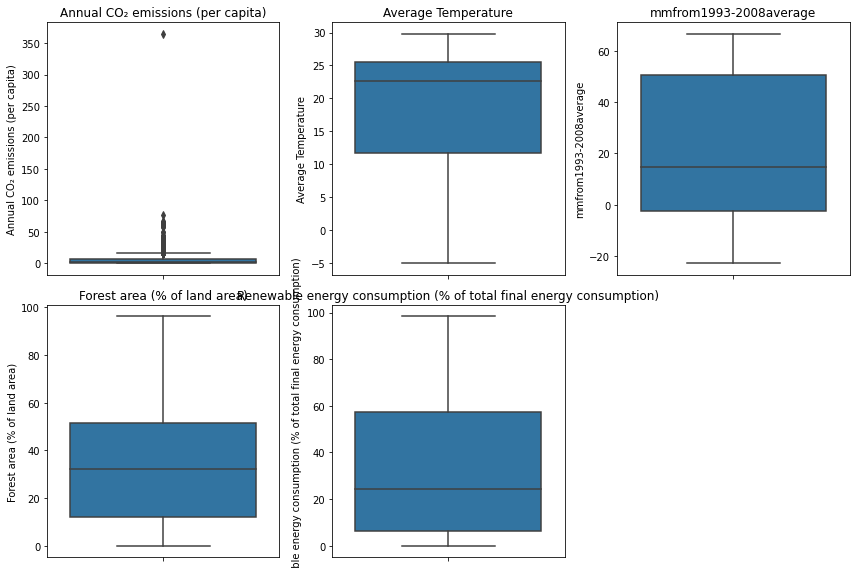

In [ ]:
# Checking for outliers 
columns_to_plt = ["Annual CO₂ emissions (per capita)", "Average Temperature", "mmfrom1993-2008average",
                   "Forest area (% of land area)", "Renewable energy consumption (% of total final energy consumption)"]

plt.figure(figsize=(12,8))
for i, col in enumerate(columns_to_plt, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=climate_merged_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### Handle missing values

- using median to fill average temperatures because temperature distributions often have outliers, especially for regions with extreme climates.Median is not significantly affected by outliers.
- Using the mean per country to fill forest area of land and Reneweable energy ensures we fill missing values based on similar data points rather than a global statistic and these values are highly dependent on the country or region.

In [ ]:
climate_merged_df["Average Temperature"].fillna(climate_merged_df["Average Temperature"].median(), inplace=True)
climate_merged_df["Forest area (% of land area)"].fillna(climate_merged_df.groupby("Entity")["Forest area (% of land area)"].transform("mean"), inplace=True)
climate_merged_df["Renewable energy consumption (% of total final energy consumption)"].fillna(
    climate_merged_df.groupby("Entity")["Renewable energy consumption (% of total final energy consumption)"].transform("mean"), inplace=True
)

# Verify that missing values are handled
climate_merged_df.isnull().sum().sum()


0

#### Climate Risk Index Dataset

In [ ]:
# Load dataset
file_path = r"Data\Climate Change - datasets\Climate Risk Index.csv"
index_df = pd.read_csv(file_path)
index_df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [ ]:
# Chaeck the shape of the dataset
index_df.shape

(182, 17)

In [ ]:
# Calculate summary statistics
index_df.describe()

,index,cartodb_id,the_geom,the_geom_webmercator,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
count,182.000000,182.000000,0.0,0.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,131.000000,182.000000,182.000000
mean,90.500000,91.500000,NaN,NaN,85.230769,81.791923,78.609890,0.519670,77.626374,86.840659,85.302198,1.517654,85.302198,907.507599
std,52.683014,52.683014,NaN,NaN,44.708529,34.582412,37.858511,3.393934,37.500688,427.350623,44.691600,8.171267,44.691600,4483.998505
min,0.000000,1.000000,NaN,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000
25%,45.250000,46.250000,NaN,NaN,46.250000,52.872500,46.250000,0.000000,46.250000,0.000000,46.250000,0.016500,46.250000,0.000000
50%,90.500000,91.500000,NaN,NaN,91.000000,77.500000,91.500000,0.020000,90.000000,2.000000,91.500000,0.084100,91.500000,30.347000
75%,135.750000,136.750000,NaN,NaN,135.000000,124.500000,114.000000,0.120000,114.000000,22.750000,135.000000,0.275950,135.000000,262.178250
max,181.000000,182.000000,NaN,NaN,135.000000,124.500000,114.000000,43.660000,114.000000,4317.000000,135.000000,77.369400,135.000000,40077.222000


In [ ]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

1) cri_rank & cri_score
- CRI score and rank measure how severely a country is affected by climate-related events.
A higher CRI rank indicates greater vulnerability to the negative impacts of climate-related disasters.

2) fatalities_per_100k_total & fatalities_rank
 - Show how deadly climate disasters are per 100,000 people.
Higher fatalities suggest regions with poor climate resilience.

3) losses_per_gdp_total & losses_per_gdp_rank
-Shows economic losses as a percentage of GDP, helping measure financial vulnerability.
If losses are high, climate events have a major economic impact in that country.

4) losses_usdm_ppp_total & losses_usdm_ppp_rank
- Shows total climate-induced economic losses in million USD.
Helps to compare how much money different countries lose due to climate-related disasters.

## 4.0 Data Cleaning

In [ ]:
# Drop the null columns
index_df = index_df.drop(['the_geom','the_geom_webmercator'],axis=1)
# Handle missing values 
index_df['losses_per_gdp__total'].fillna(index_df['losses_per_gdp__total'].median(),inplace=True)
# Drop rows with missing rw_country_code
index_df.dropna(subset=['rw_country_code'],inplace=True)
print("Cleaned dataset overview:")
print(index_df.isnull().sum())

Cleaned dataset overview:
index                        0
cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              0
rw_country_name              0
dtype: int64


- The dataset has no missing values

#### Checking for Duplicates

In [ ]:
print('Number of duplicates:',index_df.duplicated().sum())

Number of duplicates: 0


In [ ]:
# Save to CSV
index_df.to_csv('Data\Climate Change - datasets\index.csv', index=False)

In [ ]:
# Save to CSV
climate_merged_df.to_csv('Data\Climate Change - datasets\climate_merged.csv', index=False)

## 5.0 Exploratory Data Analysis

### Correlation matrix of emissions and climate indicators for 2021.

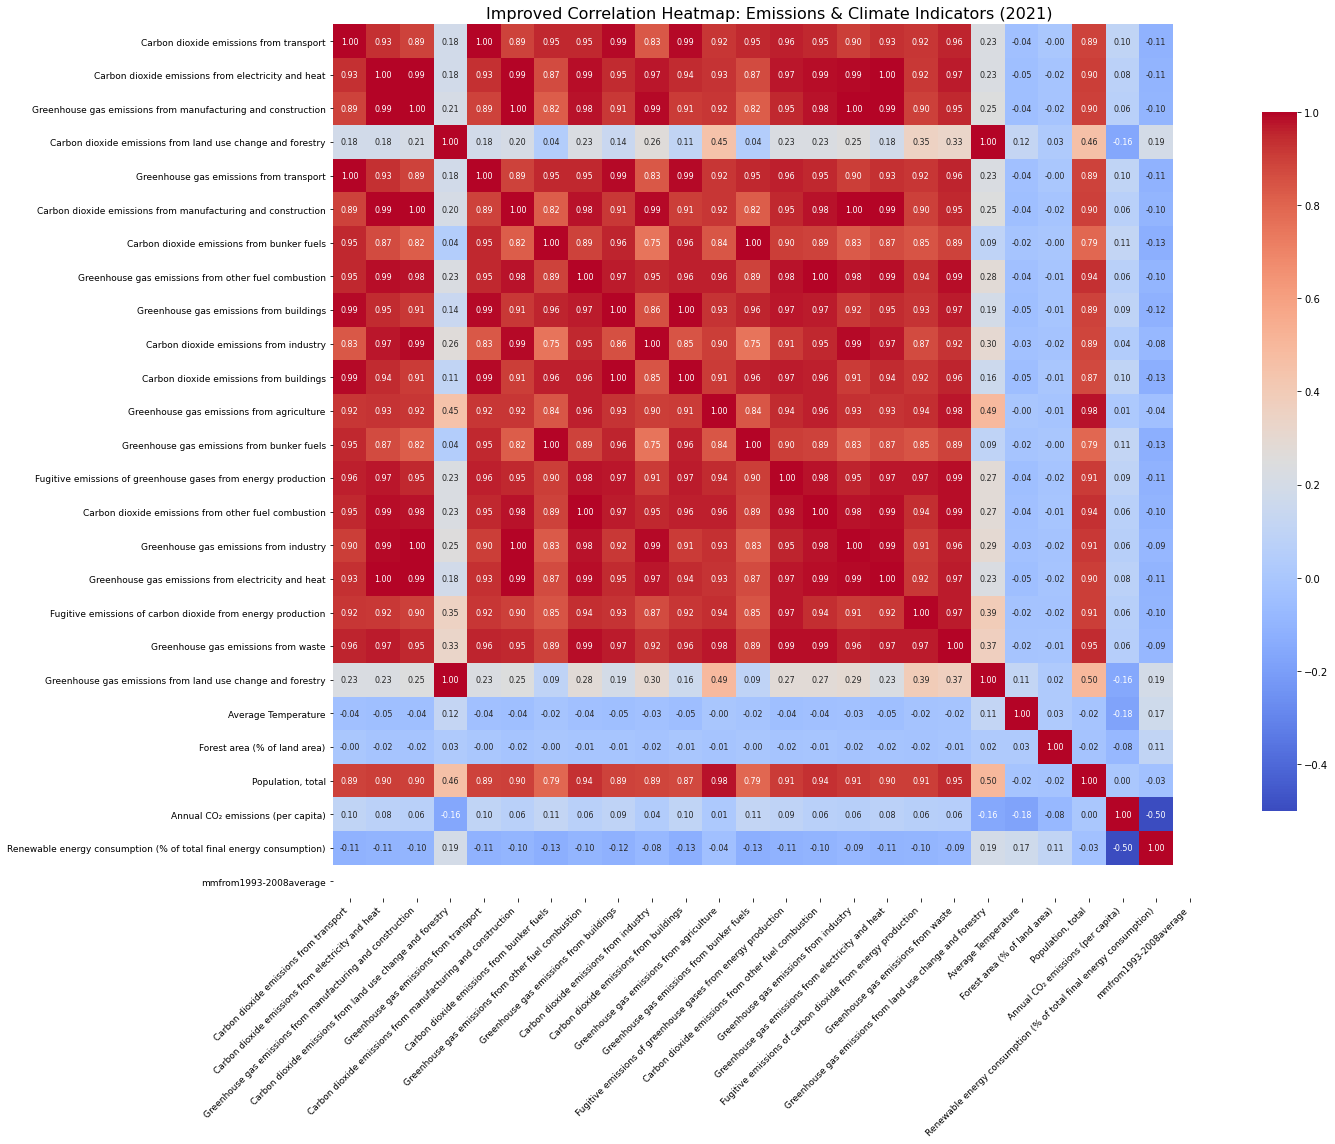

In [ ]:
# Create combined dataset for heatmap (latest year only)

# Select emissions and indicators again for consistency
carbon_emissions = [col for col in climate_merged_df.columns if "Carbon dioxide emissions" in col]
ghg_emissions = [col for col in climate_merged_df.columns if "Greenhouse gas emissions" in col]
fugitive_emissions = [col for col in climate_merged_df.columns if "Fugitive emissions" in col]
climate_indicators = [
    "Average Temperature", 
    "Forest area (% of land area)", 
    "Population, total", 
    "Annual CO₂ emissions (per capita)", 
    "Renewable energy consumption (% of total final energy consumption)",
    "mmfrom1993-2008average"
]

# Combine emissions and indicators
emission_cols = list(set(carbon_emissions + ghg_emissions + fugitive_emissions))
latest_df = climate_merged_df[climate_merged_df["Year"] == climate_merged_df["Year"].max()]
heatmap_df = latest_df[emission_cols + climate_indicators].dropna()

# Compute correlation matrix
correlation = heatmap_df.corr()

# Plot with adjusted font sizes
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})
plt.title("Improved Correlation Heatmap: Emissions & Climate Indicators (2021)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


Strong Positive Correlations Between Emission Sources

Almost all CO₂ and GHG emission sources (buildings, transport, electricity, agriculture, etc.) show strong inter-correlation (0.90+).

Suggests that emissions tend to rise and fall together across sectors — e.g., if industrial emissions go up, so do transport and electricity.

Climate Indicators vs Emissions
Population, total

Highly correlated (0.89–0.99) with nearly all emission sources.

Indicates that larger populations contribute more to emissions — directly or indirectly through energy, transport, and industrial activity.

Renewable Energy Consumption (%)

Shows consistent negative correlations with emissions:

-0.10 to -0.12 with key CO₂ sectors.

Implies that higher renewable energy adoption is associated with lower emissions, albeit weakly in this dataset snapshot.

Forest Area (% of land area)

Weakly negative or near-zero correlation with most emissions sources.

Possibly due to:

Lagged effects of deforestation

Forest-rich nations not being large emitters

Average Temperature

Mostly weak to negative correlations (around -0.05 to 0.14).

Possibly due to:

This being a single-year snapshot (2021)

Temperature influenced by cumulative emissions, not just current values

mmfrom1993-2008average (likely sea-level rise or climate anomaly)

Strong negative correlation with:

Renewable energy (-0.50)

Slightly negative with emissions too

Possibly highlights that regions with higher sea-level anomalies or climate stress invest more in renewable energy



### Top 5 Emission Sources Over Time

In [ ]:
# Emissions and indicators DataFrames
emissions_df = climate_merged_df[["Entity", "Year"] + emission_cols]
indicators_df = climate_merged_df[["Entity", "Year"] + climate_indicators]

# Group by Year (handling missing values naturally via sum and mean)
emissions_over_time = emissions_df.groupby("Year")[emission_cols].sum(min_count=1)
indicators_over_time = indicators_df.groupby("Year")[climate_indicators].mean()


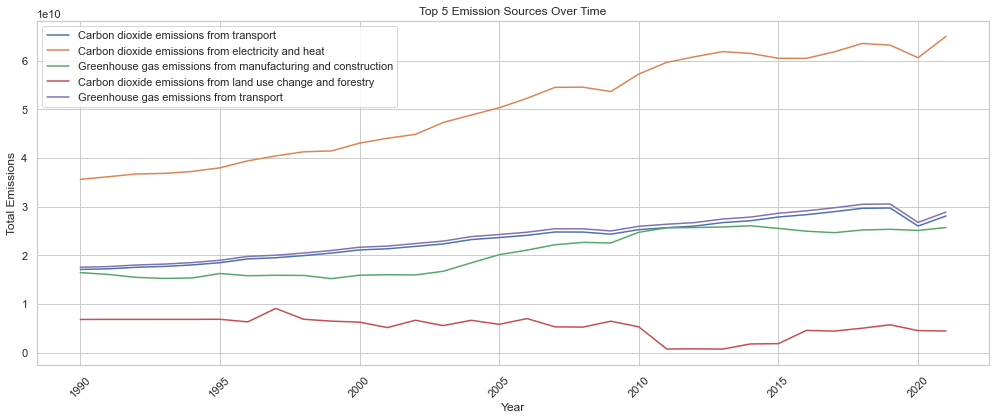

In [ ]:
# Set up plotting style
sns.set(style="whitegrid")

# Plot emissions over time
plt.figure(figsize=(14, 6))
for col in emissions_over_time.columns[:5]:  # limit to 5 for clarity
    plt.plot(emissions_over_time.index, emissions_over_time[col], label=col)

plt.title("Top 5 Emission Sources Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Emission Sources Over Time
1. Greenhouse Gas Emissions from Electricity and Heat

Dominant and rising source of emissions since 1990.

Steady increase with a notable rise between 2005–2012.

Despite some dips (~2015 and 2020), the trend continues upward — likely due to global energy demands, especially in developing economies.

Insight: Electricity and heat production are the primary contributors to global emissions, underlining the need for cleaner energy transitions.

2. Fugitive Emissions from Energy Production

Clear upward trend over time.

Rapid growth between 2000 and 2015, catching up with other major sectors.

Insight: Reflects increased extraction and burning of fossil fuels like oil, gas, and coal — especially in developing energy economies.

3. Greenhouse Gas Emissions from Industry

Slow but steady increase across the timeline.

Indicates continued industrialization, especially in Asia and Africa.

Insight: Manufacturing and construction remain key contributors and must be part of decarbonization efforts.

4. Carbon Dioxide Emissions from Other Fuel Combustion

Flat or slightly declining trend.

Suggests this sector has seen efficiency gains or fuel switching.

Insight: Policies promoting clean fuels or phasing out older technologies might be having a positive impact.

5. CO₂ Emissions from Buildings

Gradual increase, but relatively lower magnitude than others.

Some growth after 2000 may reflect urbanization and residential energy use.

Insight: As urban populations grow, emissions from buildings may become more significant if not controlled.

### Climate Indicators Over Time

<ipython-input-21-ad0702f9d71e>:15: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


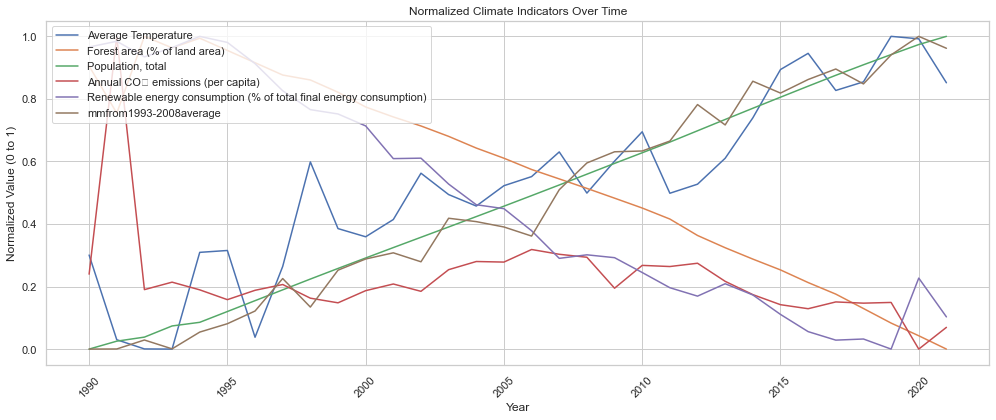

In [ ]:
# Plot climate indicators over time
# Normalize climate indicators using Min-Max scaling
normalized_indicators = (indicators_over_time - indicators_over_time.min()) / (indicators_over_time.max() - indicators_over_time.min())

# Plot all normalized indicators
plt.figure(figsize=(14, 6))
for col in normalized_indicators.columns:
    plt.plot(normalized_indicators.index, normalized_indicators[col], label=col)

plt.title("Normalized Climate Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0 to 1)")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Population, Total

Steady and sharp increase from 1990 to 2022.

Reaches the maximum normalized value by the end.

Insight: Population growth continues to intensify global climate pressures, increasing demand for energy, food, and infrastructure.

2. Average Temperature

Rising trend, especially sharp after 2005.

Normalized value climbs consistently.

Insight: Temperature increase strongly aligns with emissions and population growth, reflecting climate change impacts.

3. Forest Area (% of Land)

Steady decline over time.

One of the clearest negative trends in the chart.

Insight: Ongoing deforestation reduces carbon sinks, exacerbating climate risks and biodiversity loss.

4. CO₂ Emissions per Capita

Fluctuating but mostly flat or slightly downward trend.

Some dips in recent years suggest partial decoupling of emissions from population.

Insight: This could reflect energy efficiency improvements, renewable adoption, or policy changes in major emitting nations.

5. Renewable Energy Consumption (%)

Shows a gradual rise, especially after 2010.

Still not dominant but clearly improving.

Insight: Positive development — renewable energy is gaining ground, albeit slowly. Needs to accelerate to offset fossil fuel reliance.

6. mmfrom1993-2008average 

Increasing from mid-1990s onward.

Rises in tandem with temperature.

Insight: Rising sea level or similar climate anomaly — further evidence of warming and glacial melt.

### The relationships between climate indicators and emissions.

<ipython-input-22-5ca488e370b7>:28: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


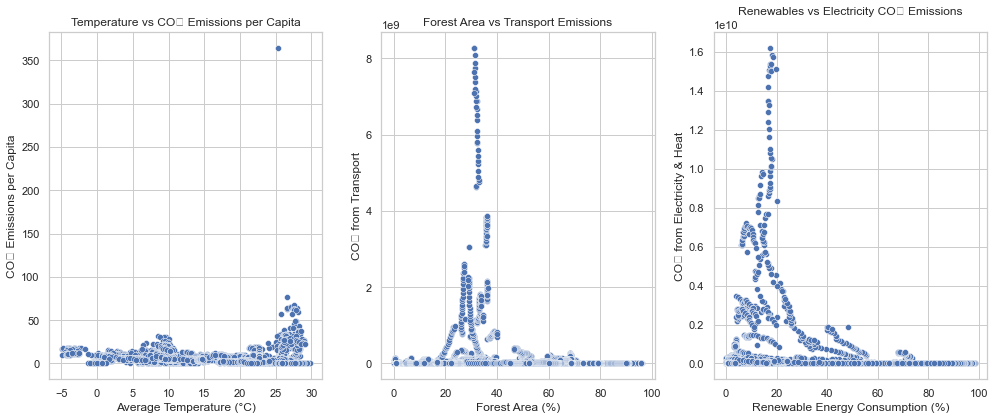

In [ ]:
# Create scatter plots for selected variable pairs
plt.figure(figsize=(14, 6))

# Average Temperature vs CO2 Emissions Per Capita
plt.subplot(1, 3, 1)
sns.scatterplot(data=climate_merged_df, x="Average Temperature", y="Annual CO₂ emissions (per capita)")
plt.title("Temperature vs CO₂ Emissions per Capita")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("CO₂ Emissions per Capita")

# Scatter: Forest Area vs Transport Emissions
plt.subplot(1, 3, 2)
sns.scatterplot(data=climate_merged_df, x="Forest area (% of land area)", 
                y="Carbon dioxide emissions from transport")
plt.title("Forest Area vs Transport Emissions")
plt.xlabel("Forest Area (%)")
plt.ylabel("CO₂ from Transport")

# Renewable Energy vs Electricity Emissions
plt.subplot(1, 3, 3)
sns.scatterplot(data=climate_merged_df, 
                x="Renewable energy consumption (% of total final energy consumption)", 
                y="Carbon dioxide emissions from electricity and heat")
plt.title("Renewables vs Electricity CO₂ Emissions")
plt.xlabel("Renewable Energy Consumption (%)")
plt.ylabel("CO₂ from Electricity & Heat")

plt.tight_layout()
plt.show()

1. Temperature vs CO₂ Emissions per Capita

Observation:

Most countries cluster between 0–25°C and 0–30 emissions per capita.

A few outliers exceed 100+ emissions per capita.

No clear linear trend.

Insight:

There is no strong direct correlation between average temperature and per capita emissions.

Some colder countries (likely fossil fuel producers/consumers) have extremely high emissions.

Climate vulnerability is not tied to emissions responsibility, highlighting the equity gap.

2. Forest Area vs CO₂ from Transport

Observation:

Highest emissions cluster around 20–40% forest cover.

Countries with extremely low or high forest area tend to have lower transport emissions.

Trend appears inverted U-shaped.

Insight:

Moderate forest cover regions may include urbanizing middle-income nations where car usage is high.

High forest cover = often low-emission, forest-rich nations (Amazon, Congo Basin).

Low forest cover = possibly arid or resource-poor countries with less transport infrastructure.

3. Renewable Energy (%) vs CO₂ from Electricity and Heat

Observation:

Strong inverse relationship: Higher renewable energy share corresponds to much lower electricity emissions.

Countries with >60% renewables show near-zero CO₂ from electricity and heat.

Insight:

This is a clear success case: transitioning to renewables directly reduces emissions.

Countries investing in hydro, wind, or solar achieve major climate benefits in the energy sector.

### Top 10 CO₂ Emitters by Sector

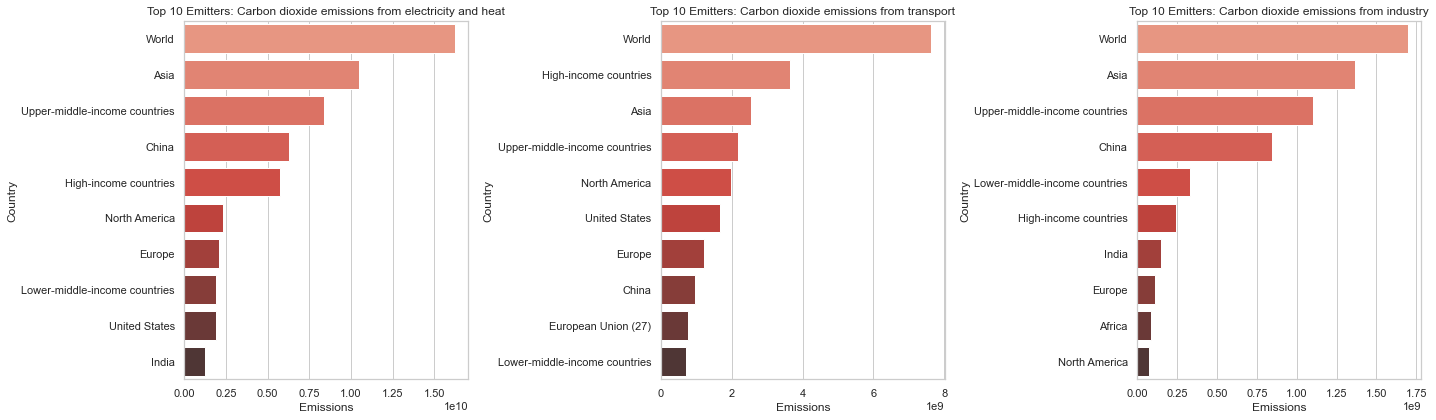

In [ ]:
# Get the most recent year available
latest_year = climate_merged_df["Year"].max()

# Filter the dataset for the latest year
latest_df = climate_merged_df[climate_merged_df["Year"] == latest_year]

# Select a few top emission sources
top_sources = [
    "Carbon dioxide emissions from electricity and heat",
    "Carbon dioxide emissions from transport",
    "Carbon dioxide emissions from industry"
]

# Sort and get top 10 countries for each emission source
top_emitters = {}
for col in top_sources:
    top_emitters[col] = latest_df[["Entity", col]].sort_values(by=col, ascending=False).head(10)


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, col in enumerate(top_sources):
    sns.barplot(data=top_emitters[col], x=col, y="Entity", ax=axes[i], palette="Reds_d")
    axes[i].set_title(f"Top 10 Emitters: {col}")
    axes[i].set_xlabel("Emissions")
    axes[i].set_ylabel("Country")

plt.tight_layout()
plt.show()


1. Electricity & Heat Production

Global emissions surpass 1.5e10 (15 billion tons).

Asia and Upper-middle-income countries dominate.

China alone emits more than high-income countries.

India and the United States are significant contributors.

Insight:

Electricity and heat are the largest emission source globally, especially in Asia. The dominance of fossil fuels in power generation is a key target for clean energy transition.

2. Transport
Emissions are led by:

High-income countries

North America and the United States

China and European Union have a smaller share compared to electricity.

Insight:

Transport emissions are driven heavily by developed regions, where car ownership, aviation, and freight are high. Urban planning and EV adoption are key here.

3. Industry
Asia again leads, followed by upper- and lower-middle-income countries.

China contributes heavily.

India, Africa, and Europe appear with smaller shares.

Insight:

Industrial emissions are a major challenge in developing economies, particularly those experiencing rapid manufacturing growth. Clean technologies and carbon capture are essential.

### Correlation : Climate Risk , Health and Economic Impact

In [ ]:
# Select relevant columns
impact_cols = [
    "country", "cri_rank", "cri_score", 
    "fatalities_total", "fatalities_per_100k_total", 
    "losses_usdm_ppp_total", "losses_per_gdp__total"
]

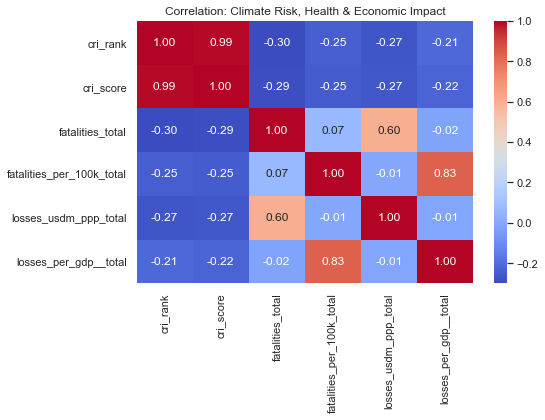

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(index_df[impact_cols[1:]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Climate Risk, Health & Economic Impact")
plt.tight_layout()
plt.show()

#### Insights from the Heatmap

##### Strong Positive Correlations

- cri_rank ↔ cri_score (0.99)

→ These are nearly identical — likely two ways of expressing the same risk index.

- fatalities_per_100k_total ↔ losses_per_gdp__total (0.83)

→ Countries with higher population-adjusted deaths also face larger GDP damage, suggesting vulnerability to climate events, especially in lower-income countries.

- fatalities_total ↔ losses_usdm_ppp_total (0.60)

→ High-fatality countries also tend to report higher absolute economic losses.

### Top 10 Countries by Total Fatalities from Climate Events

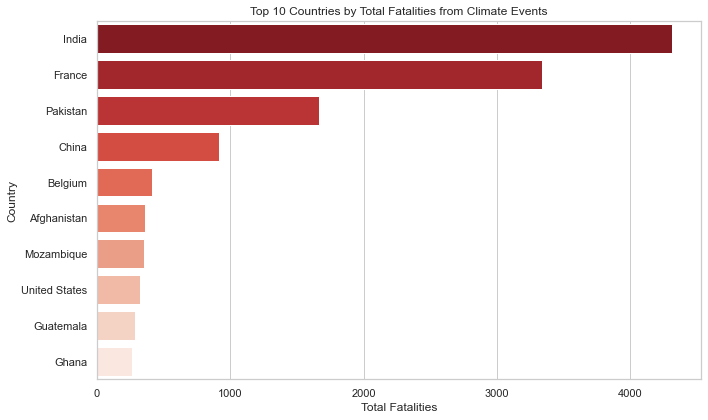

In [ ]:
# Top 10 countries by fatalities
top_fatalities = index_df[impact_cols].sort_values(by="fatalities_total", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_fatalities, x="fatalities_total", y="country", palette="Reds_r")
plt.title("Top 10 Countries by Total Fatalities from Climate Events")
plt.xlabel("Total Fatalities")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

This bar chart highlights the countries that have suffered the highest total number of deaths due to climate-related disasters.

Key Observations

- India leads with the highest number of fatalities (>4,300)

Reflects high exposure to floods, heatwaves, and storms.

Large population and varied geography increase vulnerability.

- France ranks second (~3,300 deaths)

Likely driven by deadly heatwaves, especially the 2003 European heatwave.

Surprising for a high-income nation, showing climate risk is not limited to the Global South.


### Top 10 Countries by Economic Loss (USD PPP)

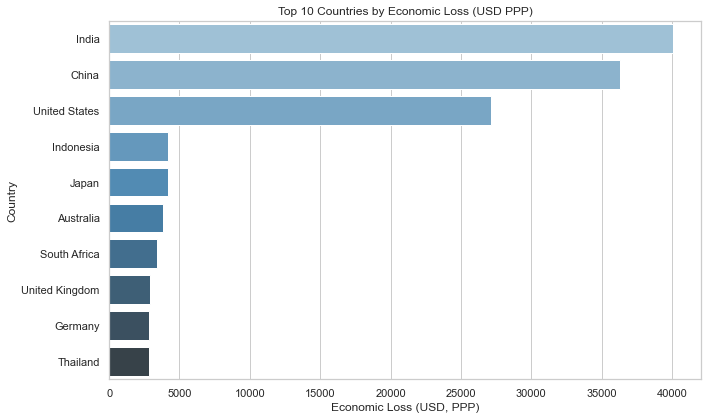

In [ ]:
# Top 10 countries by economic loss
top_losses = index_df[impact_cols].sort_values(by="losses_usdm_ppp_total", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_losses, x="losses_usdm_ppp_total", y="country", palette="Blues_d")
plt.title("Top 10 Countries by Economic Loss (USD PPP)")
plt.xlabel("Economic Loss (USD, PPP)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Key Observations

- India tops the chart with ~$40,000M (PPP) in economic loss

Massive vulnerability to cyclones, monsoons, droughts, and infrastructure damage

High population and agricultural dependence increase exposure

- China follows closely

Regularly hit by floods, typhoons, and heatwaves

High infrastructure and industrial base means damage is costly

- United States is 3rd despite wealth and preparedness

Losses driven by hurricanes, wildfires, floods, and winter storms

Climate extremes becoming more intense and frequent

### Top 10 Countries by Climate Risk Index Score

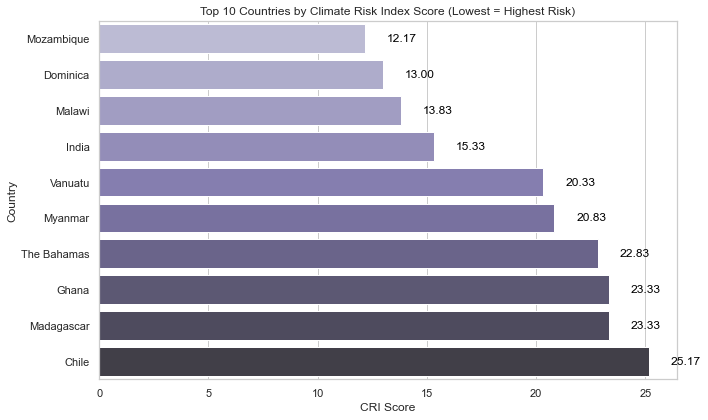

In [ ]:
# Sort by CRI score in ascending order (assuming lower = higher risk)
top_cri = index_df.sort_values(by="cri_score", ascending=True).head(10)

# Plot with values labeled
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_cri, x="cri_score", y="country", palette="Purples_d")
plt.title("Top 10 Countries by Climate Risk Index Score (Lowest = Highest Risk)")
plt.xlabel("CRI Score")
plt.ylabel("Country")

# Annotate each bar with its score
for i, v in enumerate(top_cri["cri_score"]):
    ax.text(v + 1, i, f"{v:.2f}", color='black', va='center')

plt.tight_layout()
plt.show()


Key Observations

- Mozambique (CRI Score: 12.17)

Ranks as the most climate-vulnerable country in this dataset

Highly exposed to cyclones, flooding, and droughts

- Dominica, Malawi, India follow closely

Dominica: Devastated by hurricanes like Maria

Malawi: Recurring floods, extreme weather

India: High exposure due to geography and large population

- Island and coastal nations dominate the list

Vanuatu, Bahamas, Dominica, Madagascar

Small island nations are hit hardest by rising sea levels, storms, and limited adaptive capacity

### EAST AFRICA AND KENYA

In [ ]:
# Define East African countries
East_Africa= [
    "Kenya", "Uganda", "Tanzania", "Ethiopia", "Rwanda", 
    "Burundi", "South Sudan", "Somalia", "Eritrea"
]

In [ ]:
# Filter data for East African countries
ea_climate = climate_merged_df[climate_merged_df["Entity"].isin(East_Africa)]
ea_risk = index_df[index_df["country"].isin(East_Africa)]

In [ ]:
# Group by Year to get East African regional averages
ea_climate_avg = ea_climate.groupby("Year")[climate_indicators].mean()

### East Africa - Average Climate Indicators Over Time

<ipython-input-32-71e339469c1c>:13: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


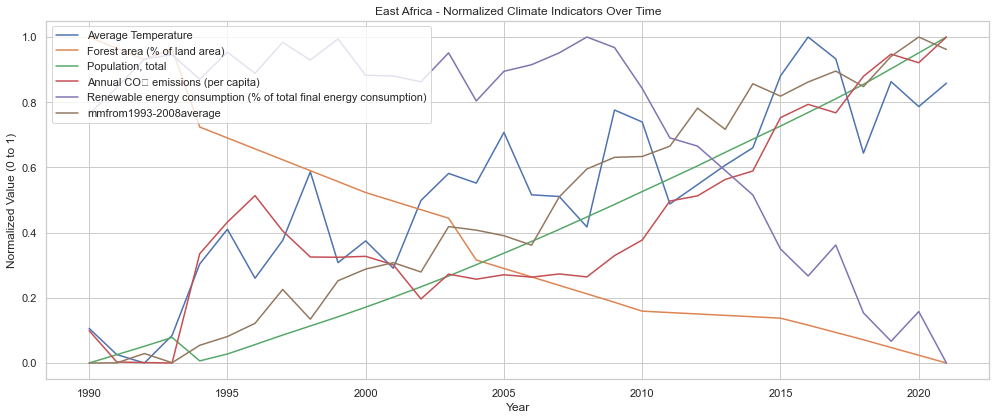

In [ ]:
# Normalize the indicators for comparison
normalized_df = (ea_climate_avg - ea_climate_avg.min()) / (ea_climate_avg.max() - ea_climate_avg.min())

plt.figure(figsize=(14, 6))
for col in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[col], label=col)

plt.title("East Africa - Normalized Climate Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0 to 1)")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


1. Population (Green Line)

Consistent upward trend from 1990 to 2022.


 2. Average Temperature (Blue Line)

Rising with fluctuation, especially post-2000.

Peaks in recent years reflect warming climate patterns in the region.

 3. Forest Area (% of land area) (Orange Line)

Steady decline — one of the most consistent downward trends.

Indicates deforestation likely due to agriculture, fuelwood, and urban expansion.

 4. CO₂ Emissions per Capita (Red Line)

Low overall, but shows a gradual increase over time.

Indicates slow industrialization and fossil fuel use growth.

 5. Renewable Energy Consumption (%) (Purple Line)

Initially high, then declining since ~2005.

Suggests growing demand is being met by non-renewables, or changes in biomass reporting.

 6. mmfrom1993-2008average (Brown Line)
 
Generally rising — may represent sea level anomalies or regional climate variability.

Confirms growing climate stress signals in East Africa.



### Top CO₂ Emitters by Sector in East Africa

<ipython-input-33-91d14be1581e>:34: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


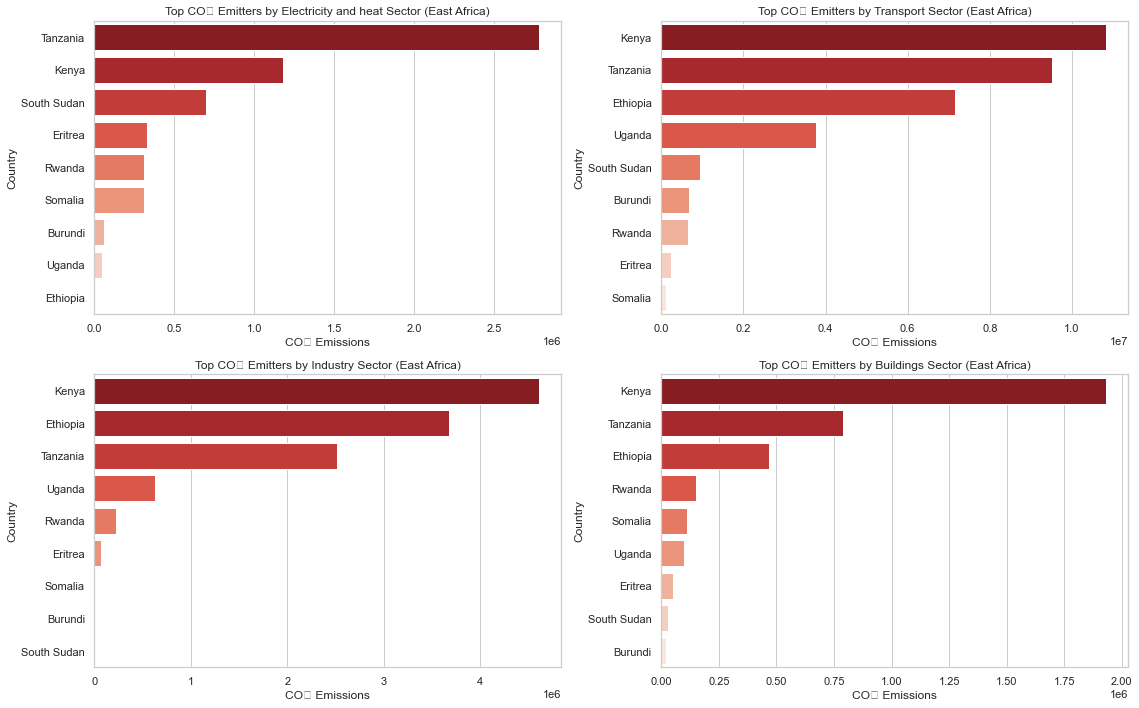

In [ ]:
# Filter for the most recent year
latest_ea_df = climate_merged_df[(climate_merged_df["Entity"].isin(East_Africa)) & (climate_merged_df["Year"] == latest_year)]

# Define relevant CO₂ emission sectors
emission_sectors = [
    "Carbon dioxide emissions from electricity and heat",
    "Carbon dioxide emissions from transport",
    "Carbon dioxide emissions from industry",
    "Carbon dioxide emissions from buildings"
]

# Prepare top emitters data for each sector
top_emitters_by_sector = {}
for sector in emission_sectors:
    top_emitters_by_sector[sector] = latest_ea_df[["Entity", sector]].sort_values(by=sector, ascending=False)

# Plot each sector separately

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, sector in enumerate(emission_sectors):
    sns.barplot(
        data=top_emitters_by_sector[sector],
        x=sector,
        y="Entity",
        ax=axes[i],
        palette="Reds_r"
    )
    axes[i].set_title(f"Top CO₂ Emitters by {sector.split(' from ')[-1].capitalize()} Sector (East Africa)")
    axes[i].set_xlabel("CO₂ Emissions")
    axes[i].set_ylabel("Country")

plt.tight_layout()
plt.show()


- Electricity & Heat Sector

Tanzania leads significantly

Followed by Kenya and South Sudan

Ethiopia and Uganda have very low emissions here

- Transport Sector

Kenya is the largest emitter in transport

Closely followed by Tanzania and Ethiopia

Reflects higher vehicle ownership and transport activity

- Industry Sector

Kenya again leads, followed by Ethiopia and Tanzania

Indicates more developed or active manufacturing bases

- Buildings Sector 

Kenya is clearly the top emitter

Tanzania and Ethiopia follow behind

Emissions here may come from residential/commercial energy use



#### NB : Kenya shows consistent top-tier emissions in 3 of 4 sectors, suggesting it's currently the most energy- and emissions-intensive country in East Africa.

### Trend of CO₂ Emissions by Sector in Kenya (1990–2022)

<ipython-input-34-859bd4f3f36d>:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


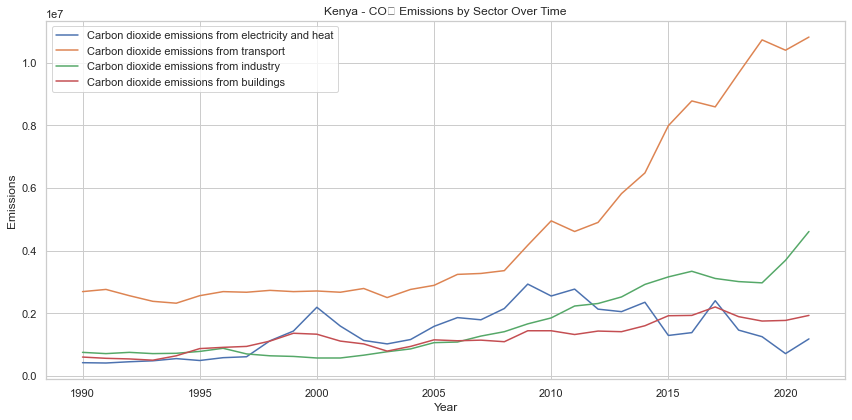

In [ ]:
# Filter for Kenya only
kenya_df = climate_merged_df[climate_merged_df["Entity"] == "Kenya"]


# Select year and emissions (without dropping missing values)
kenya_emissions = kenya_df[["Year"] + emission_sectors]

# Plot each sector over time
plt.figure(figsize=(12, 6))
for col in emission_sectors:
    plt.plot(kenya_emissions["Year"], kenya_emissions[col], label=col)

plt.title("Kenya - CO₂ Emissions by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


Sectoral Emission Trends:

- Transport (Orange Line)

Largest and fastest-growing source of emissions

Rapid growth especially post-2010, likely due to:

Increased vehicle ownership

Urbanization and road transport expansion

- Industry (Red Line) 

Moderate but steady rise since early 2000s

Reflects growing manufacturing and industrial activity

- Buildings (Pink Line)

Gradual rise over time

Indicates increasing energy use in homes, offices, and urban developments

- Electricity & Heat (Yellow Line)

Fluctuates, but relatively low

Kenya’s reliance on renewables (hydro, geothermal) may explain the lower emissions here

#### Kenya - Climate Indicators Over Time

<ipython-input-35-5a3e60ce0617>:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


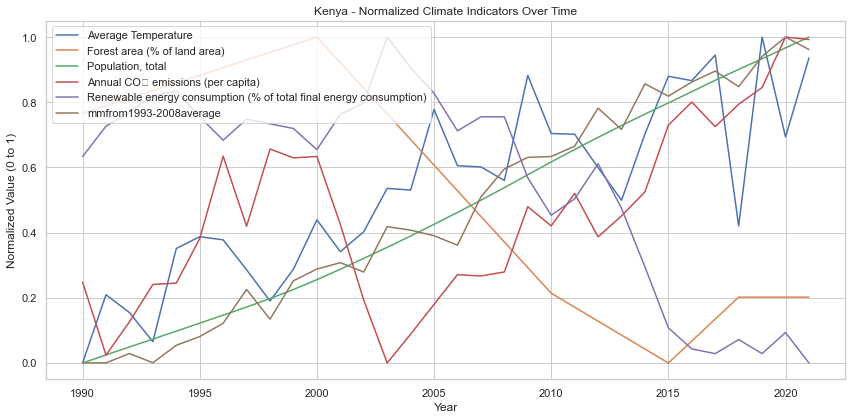

In [ ]:
# Filter relevant columns for Kenya
kenya_climate_indicators = kenya_df[["Year"] + climate_indicators]
# Normalize climate indicators for Kenya (Min-Max scaling)
normalized_kenya = (kenya_climate_indicators.set_index("Year") - kenya_climate_indicators.set_index("Year").min()) / \
                   (kenya_climate_indicators.set_index("Year").max() - kenya_climate_indicators.set_index("Year").min())

# Plot normalized indicators

plt.figure(figsize=(12, 6))
for col in normalized_kenya.columns:
    plt.plot(normalized_kenya.index, normalized_kenya[col], label=col)

plt.title("Kenya - Normalized Climate Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0 to 1)")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


- Population (Green Line)

Smooth, steady rise — from 0 to 1 (min to max population in dataset).

Reflects Kenya’s strong demographic growth, which increases pressure on:

Resources (land, water, food)

Infrastructure (housing, transport)

Climate and energy demand

 Insight: Population growth is a primary driver of demand-side climate stress.

- Average Temperature (Blue Line)

Rising with fluctuations — climbs from ~0.3 to nearly 1.

Spikes indicate years of heat extremes.

Insight: Kenya is experiencing warming temperatures in line with global climate change. This threatens agriculture, water access, and health.

- Forest Area (% of Land Area) (Orange Line)

Consistent decline from 1 to near 0.

Suggests extensive deforestation due to:

Agriculture expansion

Charcoal/fuelwood use

Urban growth

 Insight: Kenya is rapidly losing forest cover, weakening natural climate buffers.

- CO₂ Emissions per Capita (Red Line)

Fluctuating, but overall rising trend

Jumps post-2010 possibly due to:

Urbanization

Industrial growth

Motorization

 Insight: While still low globally, emissions per capita are increasing, showing a shift toward fossil fuel use.

- Renewable Energy Consumption (%) (Purple Line)

Starts high, then gradually declines post-2005.

Could indicate:

Increasing use of grid electricity (some fossil fuel share)

Drop in biomass use

Modernization of energy mix

 Insight: Kenya’s renewable share is still strong, but vigilance is needed to prevent decline in clean energy reliance.

 - mmfrom1993-2008average (Brown Line) (assumed climate anomaly)

Moderate increase; aligns with temperature and CO₂ rise.

Insight: Kenya may be facing climate stress signals such as sea level rise or rainfall anomalies.

## 6.0 Modelling

## 7.0 Conclusion and Recommendation